# Evaluating Regression Models

In [41]:
#Disable warnings
import warnings
warnings.filterwarnings("ignore")

#General libraries needed
import pandas as pd
import numpy as np

#Libraries for graphing
import matplotlib.pyplot as plt
import seaborn as sns

#sklearn imports
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#Library for statistical testing and mathematics
from scipy import stats
from math import sqrt

#Datasets
from pydataset import data 

## Load Dataset

We will utilize the `tips` dataset.

In [18]:
tips = data('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


## Linear Regression Model

Fit a linear regression model (ordinary least squares) and compute `yhat`, predictions of `tip` using `total_bill`.

### Create a baseline prediction

In [19]:
baseline = tips.tip.mean()
baseline

2.9982786885245902

In [20]:
#baseline is mean of dependent variable
tips['baseline'] = tips.tip.mean()
tips.head()

,total_bill,tip,sex,smoker,day,time,size,baseline
1,16.99,1.01,Female,No,Sun,Dinner,2,2.998279
2,10.34,1.66,Male,No,Sun,Dinner,3,2.998279
3,21.01,3.50,Male,No,Sun,Dinner,3,2.998279
4,23.68,3.31,Male,No,Sun,Dinner,2,2.998279
5,24.59,3.61,Female,No,Sun,Dinner,4,2.998279


### Fit the model

First we will fit the linear regression model (ordinary least squares). 

In [21]:
#Create the model object
lm = LinearRegression(normalize=True)

# fit the model to training data
lm.fit(tips[['total_bill']], tips.tip)

LinearRegression(normalize=True)

### Make prediction

In [22]:
tips['yhat'] = lm.predict(tips[['total_bill']])

tips

,total_bill,tip,sex,smoker,day,time,size,baseline,yhat
1,16.99,1.01,Female,No,Sun,Dinner,2,2.998279,2.704636
2,10.34,1.66,Male,No,Sun,Dinner,3,2.998279,2.006223
3,21.01,3.50,Male,No,Sun,Dinner,3,2.998279,3.126835
4,23.68,3.31,Male,No,Sun,Dinner,2,2.998279,3.407250
5,24.59,3.61,Female,No,Sun,Dinner,4,2.998279,3.502822
...,...,...,...,...,...,...,...,...,...
240,29.03,5.92,Male,No,Sat,Dinner,3,2.998279,3.969131
241,27.18,2.00,Female,Yes,Sat,Dinner,2,2.998279,3.774836
242,22.67,2.00,Male,Yes,Sat,Dinner,2,2.998279,3.301175
243,17.82,1.75,Male,No,Sat,Dinner,2,2.998279,2.791807


### Compute the residuals

In [25]:
tips['residual'] = tips['yhat'] - tips['tip']
tips['residual_baseline'] = tips['baseline'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,baseline,yhat,residual,residual_baseline
1,16.99,1.01,Female,No,Sun,Dinner,2,2.998279,2.704636,1.694636,1.988279
2,10.34,1.66,Male,No,Sun,Dinner,3,2.998279,2.006223,0.346223,1.338279
3,21.01,3.50,Male,No,Sun,Dinner,3,2.998279,3.126835,-0.373165,-0.501721
4,23.68,3.31,Male,No,Sun,Dinner,2,2.998279,3.407250,0.097250,-0.311721
5,24.59,3.61,Female,No,Sun,Dinner,4,2.998279,3.502822,-0.107178,-0.611721


### Plot the residuals

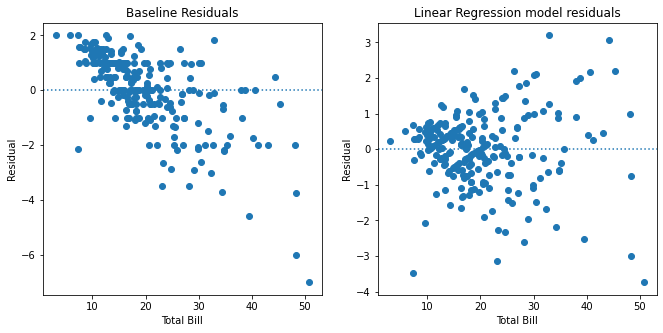

In [27]:
# residual plots 

plt.figure(figsize = (11,5))

plt.subplot(121)
plt.scatter(tips.total_bill, tips.residual_baseline)
plt.axhline(y = 0, ls = ':')
plt.xlabel('Total Bill')
plt.ylabel('Residual')
plt.title('Baseline Residuals')

plt.subplot(122)
plt.scatter(tips.total_bill, tips.residual)
plt.axhline(y = 0, ls = ':')
plt.xlabel('Total Bill')
plt.ylabel('Residual')
plt.title('Linear Regression model residuals');

## Evaluative Metrics

### Sum of Squared Errors (SSE)

In [28]:
# first calculate the square of residuals

tips['residual^2'] = tips.residual**2
tips['residual_baseline^2'] = tips.residual_baseline**2

tips.head()

,total_bill,tip,sex,smoker,day,time,size,baseline,yhat,residual,residual_baseline,residual^2,residual_baseline^2
1,16.99,1.01,Female,No,Sun,Dinner,2,2.998279,2.704636,1.694636,1.988279,2.871792,3.953252
2,10.34,1.66,Male,No,Sun,Dinner,3,2.998279,2.006223,0.346223,1.338279,0.119870,1.790990
3,21.01,3.50,Male,No,Sun,Dinner,3,2.998279,3.126835,-0.373165,-0.501721,0.139252,0.251724
4,23.68,3.31,Male,No,Sun,Dinner,2,2.998279,3.407250,0.097250,-0.311721,0.009458,0.097170
5,24.59,3.61,Female,No,Sun,Dinner,4,2.998279,3.502822,-0.107178,-0.611721,0.011487,0.374203


In [30]:
SSE = tips['residual^2'].sum()
SSE_baseline = tips['residual_baseline^2'].sum()

print('SSE =', "{:.1f}".format(SSE))
print("SSE Baseline =", "{:.1f}".format(SSE_baseline))

SSE = 252.8
SSE Baseline = 465.2


### Explained Sum of Squares (ESS)

In [34]:
ESS = sum((tips.yhat - tips.tip.mean())**2)

ESS_baseline = sum((tips.baseline - tips.tip.mean())**2)

print('ESS =', "{:.1f}".format(ESS))
print("ESS Baseline =", "{:.1f}".format(ESS_baseline))

ESS = 212.4
ESS Baseline = 0.0


### Total Sum of Squares (TSS)

In [36]:
TSS = ESS + SSE
print('TSS =', "{:.1f}".format(TSS))

TSS = 465.2


### Mean Squared Error (MSE)

In [39]:
MSE = SSE/len(tips)
MSE_baseline = SSE_baseline/len(tips)

print("MSE = ", MSE)
print("MSE baseline = ", MSE_baseline)

MSE =  1.036019442011377
MSE baseline =  1.906608512496641


### Root Mean Squared Error (RMSE)

In [42]:
RMSE = sqrt(MSE)
RMSE_baseline = sqrt(MSE_baseline)

print("RMSE = ", RMSE)
print("RMSE baseline = ", RMSE_baseline)

RMSE =  1.0178504025697377
RMSE baseline =  1.3807999538298954


### Comparing SSE model with baseline

Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

In [43]:
def evaluate_SSE(SSE, SSE_baseline):
    if SSE < SSE_baseline:
        print("The model performs better than baseline.")
    elif SSE > SSE_baseline:
        print("The model performs worse than baseline.")
    elif SSE == SSE_baseline:
        print("The model performs equally well as baseline.")

In [44]:
evaluate_SSE(SSE, SSE_baseline)

The model performs better than baseline.
